# estimation_of_obesity levels
in this project we want to find a good model for estimation_of_obesity levels. we will check RandomForestClassifier and DecisionTreeClassifier and KNeighborsClassifier to figure out which one is better.

# importting libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# reading dataset

In [69]:
data_set=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data_set.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# making copy of dataset

In [70]:
mycopy=data_set.copy()

In [71]:
mycopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [72]:
X=mycopy[["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC"
         ,"NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS"]].values

Y=mycopy["NObeyesdad"].values

# converting categorical variables into numerical variables

In [73]:
encoder1=LabelEncoder()
encoder1.fit(["Female","Male"])
X[:,0]=encoder1.transform(X[:,0])

encoder2=LabelEncoder()
encoder2.fit(["yes","no"])
X[:,4]=encoder2.transform(X[:,4])

encoder3=LabelEncoder()
encoder3.fit(["yes","no"])
X[:,5]=encoder3.transform(X[:,5])

encoder4=LabelEncoder()
encoder4.fit(['Sometimes', 'Frequently', 'Always', 'no'])
X[:,8]=encoder4.transform(X[:,8])

encoder5=LabelEncoder()
encoder5.fit(["yes","no"])
X[:,9]=encoder5.transform(X[:,9])

encoder6=LabelEncoder()
encoder6.fit(["yes","no"])
X[:,11]=encoder6.transform(X[:,11])

encoder7=LabelEncoder()
encoder7.fit(['no', 'Sometimes', 'Frequently', 'Always'])
X[:,14]=encoder7.transform(X[:,14])

encoder8=LabelEncoder()
encoder8.fit(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike','Bike'])
X[:,15]=encoder8.transform(X[:,15])

# train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

# RandomForestClassifier

In [84]:
rand=RandomForestClassifier()
myfit=rand.fit(x_train,y_train)

In [85]:
pred=rand.predict(x_test)

In [86]:
score=f1_score(y_test,pred,average="weighted")
print(f"F1-score : {score}")

F1-score : 0.9575239911771585


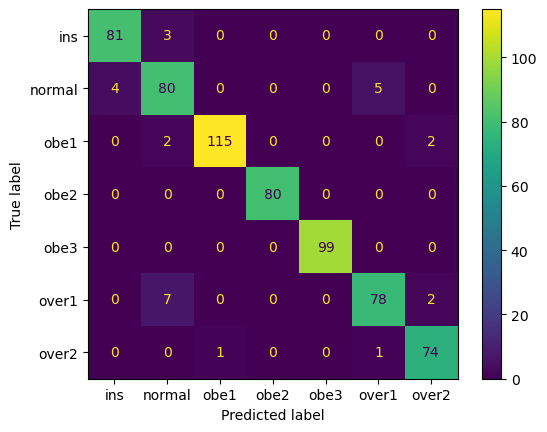

<Figure size 1000x1500 with 0 Axes>

In [114]:
con=confusion_matrix(y_test,pred,labels=myfit.classes_)
CM=ConfusionMatrixDisplay(con,display_labels=["ins","normal","obe1","obe2","obe3","over1","over2"])
CM.plot()
plt.figure(figsize=(10,15))
plt.show()

# DecisionTreeClassifier

In [78]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
pred2=tree.predict(x_test)

In [80]:
score=f1_score(y_test,pred2,average="weighted")
print(f"F1-score : {score}")

F1-score : 0.9289788388027053


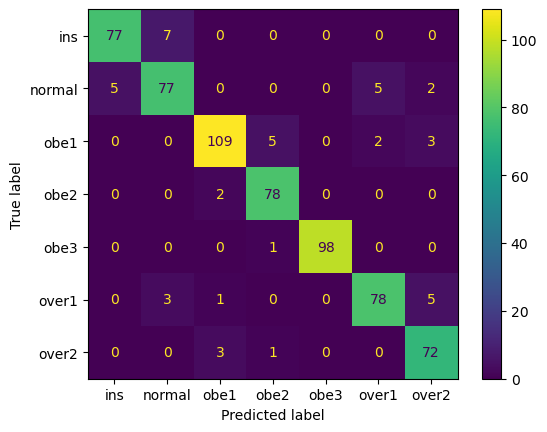

<Figure size 1000x1500 with 0 Axes>

In [115]:
con=confusion_matrix(y_test,pred2,labels=myfit.classes_)
CM=ConfusionMatrixDisplay(con,display_labels=["ins","normal","obe1","obe2","obe3","over1","over2"])
CM.plot()
plt.figure(figsize=(10,15))
plt.show()

# KNeighborsClassifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
negh=KNeighborsClassifier(n_neighbors=7)
negh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [117]:
pred3=negh.predict(x_test)

In [118]:
score=f1_score(y_test,pred3,average="weighted")
print(f"F1-score : {score}")

F1-score : 0.8457366935723445


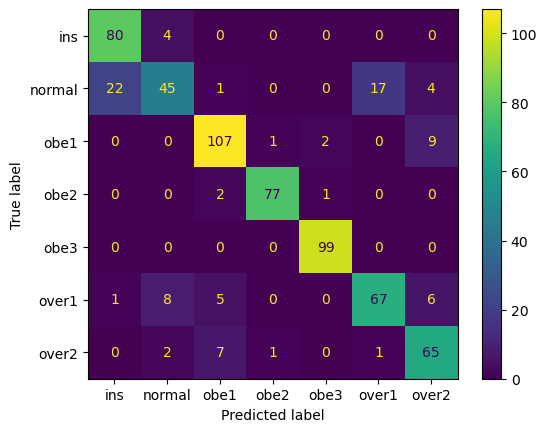

<Figure size 1000x1500 with 0 Axes>

In [119]:
con=confusion_matrix(y_test,pred3,labels=myfit.classes_)
CM=ConfusionMatrixDisplay(con,display_labels=["ins","normal","obe1","obe2","obe3","over1","over2"])
CM.plot()
plt.figure(figsize=(10,15))
plt.show()

as you see RandomForestClassifier has higher F1-SCORE than others.it means RandomForestClassifier can estimate obesity levels better than others.